# Immgen ATAC-Seq


In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm
import re
import tempfile
import pyranges as pr
from pyranges import PyRanges


In [3]:
PATH = os.path.expanduser('~/data/2024_Immgen')
! mkdir -p {PATH}/pics

def file_to_name(file):
    return re.sub('(.*SRR[0-9]+_)|(_ATAC_seq.*)', '', os.path.basename(file))


def file_to_srr(file):
    return re.sub('_.*', '', os.path.basename(file))

In [4]:
def bedl(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return tf[2] - tf[1]
    except:
        return np.zeros(0)  # Empty file


def lines(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return len(tf)
    except:
        return 0  # Empty file


def d(a, b):
    return a / b if b != 0 else 0


def sorted_file(file):
    ts = tempfile.mktemp()
    !cat {file} | sort -k1,1 -k2,2n > {ts}
    return ts


def last_col(file):
    try:
        cols = len(pd.read_csv(file, sep='\t', nrows=1, header=None).columns)
        return pd.read_csv(file, sep='\t', header=None, usecols=[cols - 1])[cols - 1]
    except:
        return np.zeros(0)  # Empty file

# Load peaks

In [5]:
TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'HOMER', 'Hotspot', 'Peakseq', 'SPAN']
palette = plt.get_cmap('tab10')
TOOLS_PALETTE = {t: palette(i) for i, t in enumerate(TOOLS)}
TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'HOMER', 'Hotspot', 'SPAN']

In [6]:
def atac_load_peaks(path, suffix):
    df = pd.DataFrame(columns=['file', 'peaks'], dtype=object)
    for f in tqdm(os.listdir(path)):
        if not f.endswith(suffix):
            continue
        file = os.path.join(path, f)
        ps = lines(file)
        df.loc[len(df)] = (file, ps)
    return df


def atac_load_peaks_path(path):
    df_macs2 = atac_load_peaks(os.path.join(path, 'macs2'), '.narrowPeak')
    df_macs2['tool'] = 'MACS2'
    print('MACS2', len(df_macs2))

    df_macs2_broad = atac_load_peaks(os.path.join(path, 'macs2'), '.broadPeak')
    df_macs2_broad['tool'] = 'MACS2 broad'
    print('MACS2', len(df_macs2_broad))

    df_sicer = atac_load_peaks(os.path.join(path, 'sicer'), '.scoreisland')
    df_sicer['tool'] = 'SICER'
    print('SICER', len(df_sicer))

    df_span = atac_load_peaks(os.path.join(path, 'span'), '.peak')
    df_span['tool'] = 'SPAN'
    print('SPAN', len(df_span))

    df_homer = atac_load_peaks(os.path.join(path, 'homer'), '.peaks')
    df_homer['tool'] = 'HOMER'
    print('HOMER', len(df_homer))

    df_hotspot = atac_load_peaks(os.path.join(path, 'hotspot'), '.peak')
    df_hotspot['tool'] = 'Hotspot'
    print('Hotspot', len(df_hotspot))

    return pd.concat([df_macs2, df_macs2_broad, df_sicer, df_span, df_homer, df_hotspot]).reset_index(drop=True)

In [7]:
dfa = atac_load_peaks_path(PATH)
dfa['name'] = [file_to_name(f) for f in dfa['file']]
dfa['srr'] = [file_to_srr(f) for f in dfa['file']]
dfa.sort_values(by='name', inplace=True)
print(list(sorted(dfa['name'].unique())))
dfa.sample(3)

  0%|          | 0/1480 [00:00<?, ?it/s]

MACS2 185


  0%|          | 0/1480 [00:00<?, ?it/s]

MACS2 185


  0%|          | 0/185 [00:00<?, ?it/s]

SICER 185


  0%|          | 0/2220 [00:00<?, ?it/s]

SPAN 185


  0%|          | 0/185 [00:00<?, ?it/s]

HOMER 185


  0%|          | 0/185 [00:00<?, ?it/s]

Hotspot 185
['Blood_Monocyte', 'Bone_marrow_B_Cell', 'Bone_marrow_NK_Cell', 'Bone_marrow_Neutrophil', 'Bone_marrow_Stem_Cell', 'Colon_CD4_Treg_Cell', 'Lung_Macrophage', 'Lymph_nodes_gdT_Cell', 'Peritoneal_cavity_B_Cell', 'Peritoneal_cavity_Macrophage', 'Peritoneal_cavity_Neutrophil', 'Skin_draining_lymph_node_Stromal_Cell', 'Small_Intestine_CD8_T_Cell', 'Small_intestine_Dendritic_Cell', 'Small_intestine_Innate_Lymphocytes', 'Small_intestine_lamina_propria_Macrophage', 'Spleen_Activated_T_Cell', 'Spleen_B_Cell', 'Spleen_CD4_Naive_T_Cell', 'Spleen_CD4_Treg_Cell', 'Spleen_CD8_Naive_T_Cell', 'Spleen_CD8_T_Cell', 'Spleen_Dendritic_Cell', 'Spleen_Macrophage', 'Spleen_NKT_Cell', 'Spleen_NK_Cell', 'Spleen_Neutrophil', 'Spleen_gdT_Cell', 'Thymus_CD4_SP_Thymocytes', 'Thymus_CD8_SP_Thymocytes', 'Thymus_DP_Thymocytes', 'Thymus_Double_Negative_Thymocytes', 'Thymus_Immature_Single_Positive_Thymocytes', 'Thymus_Thymic_epithelial_Cell', 'Thymus_gdT_Cell', 'brain_Microglia']


file   peaks     tool  \
514  /home/jetbrains/data/2024_Immgen/sicer/SRR5799...   29551    SICER   
982  /home/jetbrains/data/2024_Immgen/hotspot/SRR57...  448884  Hotspot   
582  /home/jetbrains/data/2024_Immgen/span/SRR57995...   50452     SPAN   

                           name         srr  
514  Small_Intestine_CD8_T_Cell  SRR5799444  
982               Spleen_B_Cell  SRR5799514  
582       Bone_marrow_Stem_Cell  SRR5799537

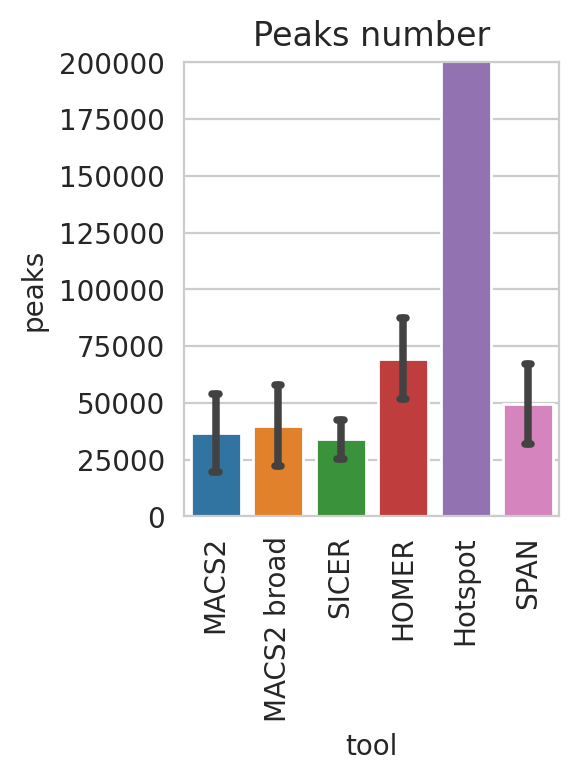

In [8]:
plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=dfa, x='tool', y='peaks',
            order=TOOLS,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.1,
            # err_kws={'linewidth': 2},
            # legend=False,
            ax=ax)
ax.set_ylim(0, 200_000)
plt.xticks(rotation=90)
plt.title('Peaks number')
plt.tight_layout()
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


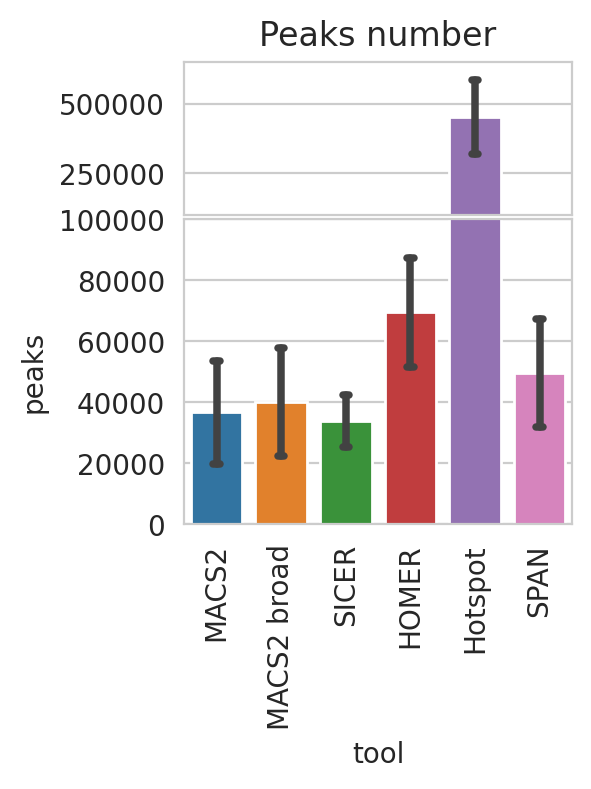

In [26]:
# Set up the matplotlib figure with broken y-axis
f, (axt, ax) = plt.subplots(2, 1, sharex=True, figsize=(2.5, 3),
                            gridspec_kw={'height_ratios': [1, 2]})
for j, axes in enumerate([ax, axt]):
    sns.barplot(data=dfa, x='tool', y='peaks',
            order=TOOLS,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.1,
            ax=axes)
ax.set_ylim(0, 100_000)
axt.set_ylim(100_000, 650_000)
axt.set_xlabel(None)
axt.set_ylabel(None)
ax.xaxis.set_tick_params(rotation=90)
axt.title.set_text('Peaks number')
ax.set_ylabel('peaks')
axt.legend().set_visible(False)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.02)  # Adjust hspace closer to zero to remove spacing
plt.show()

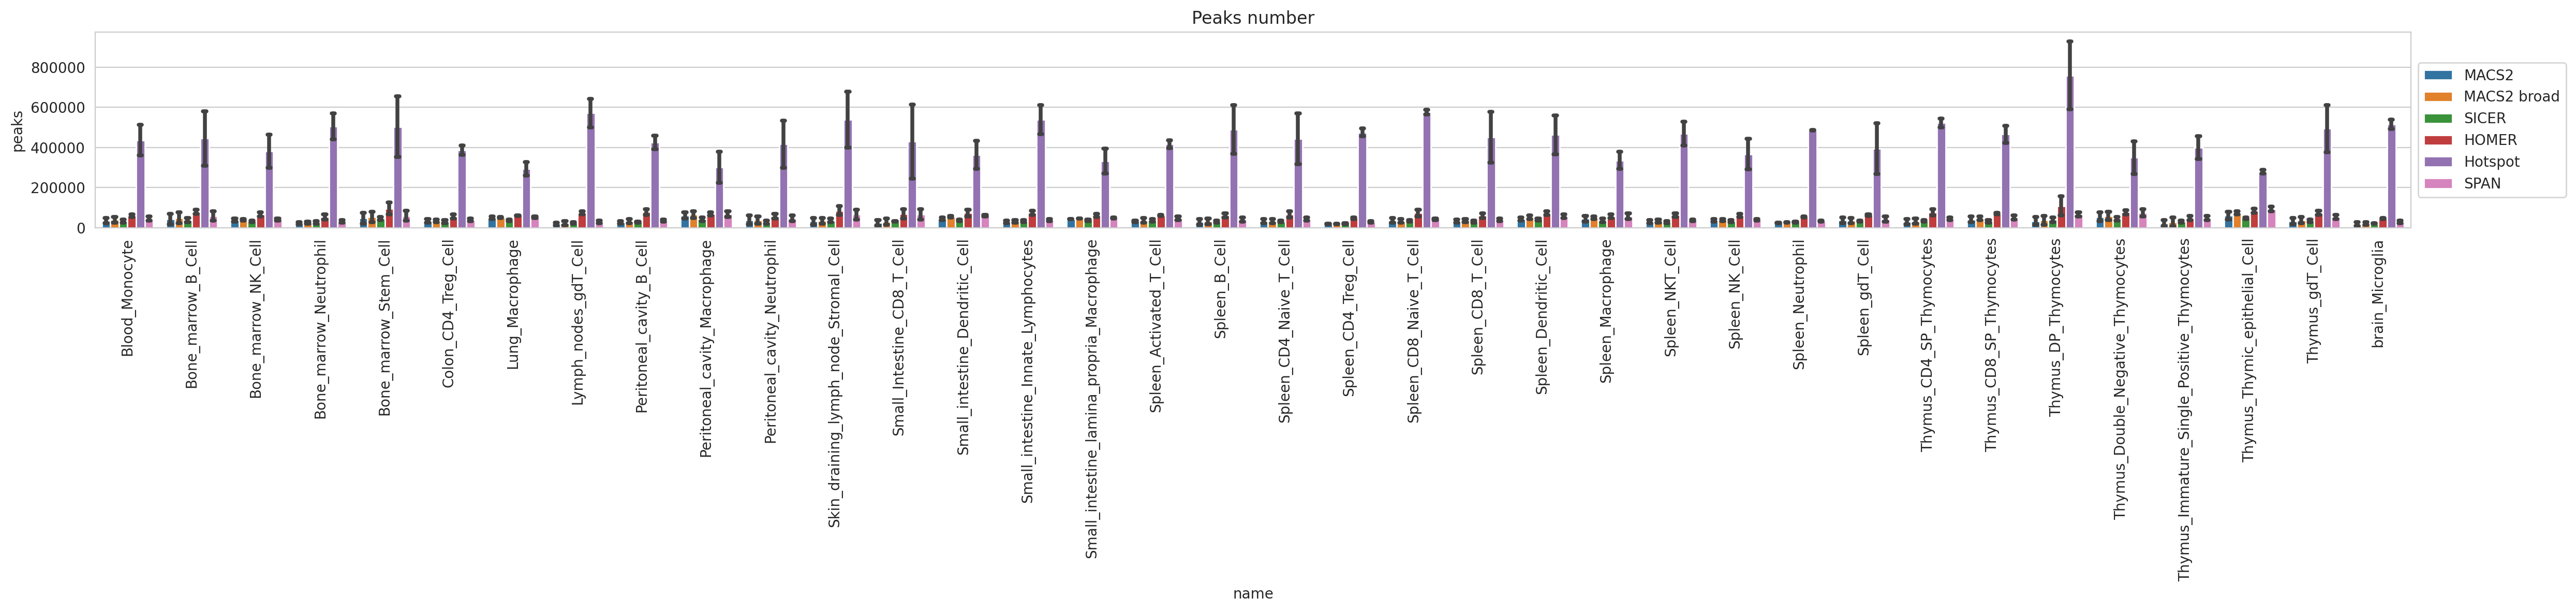

In [8]:
plt.figure(figsize=(25, 6))
g_result = sns.barplot(data=dfa, x='name', y='peaks', hue='tool',
                       hue_order=TOOLS,
                       palette=TOOLS_PALETTE,
                       errorbar='sd', capsize=.05,
                       # err_kws={'linewidth': 2}
                       )
g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Peaks number')
plt.tight_layout()
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
ts = []
for srr, name, tool, file in tqdm(zip(dfa['srr'], dfa['name'], dfa['tool'], dfa['file'])):
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    # Some tracks may have open chromatin clusters, which significantly affects average, 
    # so pick only lengths limited to 80%
    t.sort_values(by=['length'], inplace=True)
    t = t.iloc[0:int(len(t) * 0.8)].copy()
    t = t.sample(min(len(t), 10_000)).copy()
    t['srr'] = srr
    t['name'] = name
    t['tool'] = tool
    ts.append(t)
df_lens = pd.concat(ts).reset_index(drop=True)
del ts
df_lens.sample(10)

0it [00:00, ?it/s]

length         srr                                   name  \
6937385      246  SRR5799555                Spleen_CD8_Naive_T_Cell   
932890       360  SRR5799447                     Bone_marrow_B_Cell   
7113944      115  SRR5799441                      Spleen_CD8_T_Cell   
3651060      460  SRR5799552  Skin_draining_lymph_node_Stromal_Cell   
603621       600  SRR5799453                     Bone_marrow_B_Cell   
7608802       83  SRR5799504                  Spleen_Dendritic_Cell   
7656369       36  SRR5799503                  Spleen_Dendritic_Cell   
1316971      220  SRR5799418                    Bone_marrow_NK_Cell   
3924978       84  SRR5799508  Skin_draining_lymph_node_Stromal_Cell   
10604510      82  SRR5799427                        Thymus_gdT_Cell   

                 tool  
6937385   MACS2 broad  
932890           SPAN  
7113944   MACS2 broad  
3651060          SPAN  
603621           SPAN  
7608802   MACS2 broad  
7656369       Hotspot  
1316971         MACS2  
3924978         MACS2  
10604510        MACS2

In [10]:
print(df_lens['length'].min())
df_lens = df_lens[df_lens['length'] > 0].reset_index(drop=True)

0


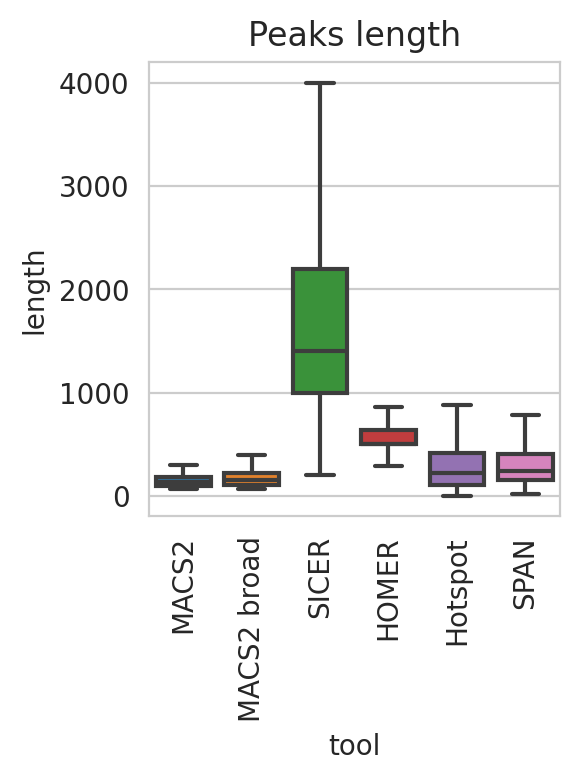

In [11]:
plt.figure(figsize=(3, 4))
g_result = sns.boxplot(data=df_lens, x='tool', y='length',
                       order=TOOLS,
                       palette=TOOLS_PALETTE,
                       showfliers=False)
plt.xticks(rotation=90)
plt.title('Peaks length')
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks_length.pdf', bbox_inches='tight', dpi=300)
plt.show()

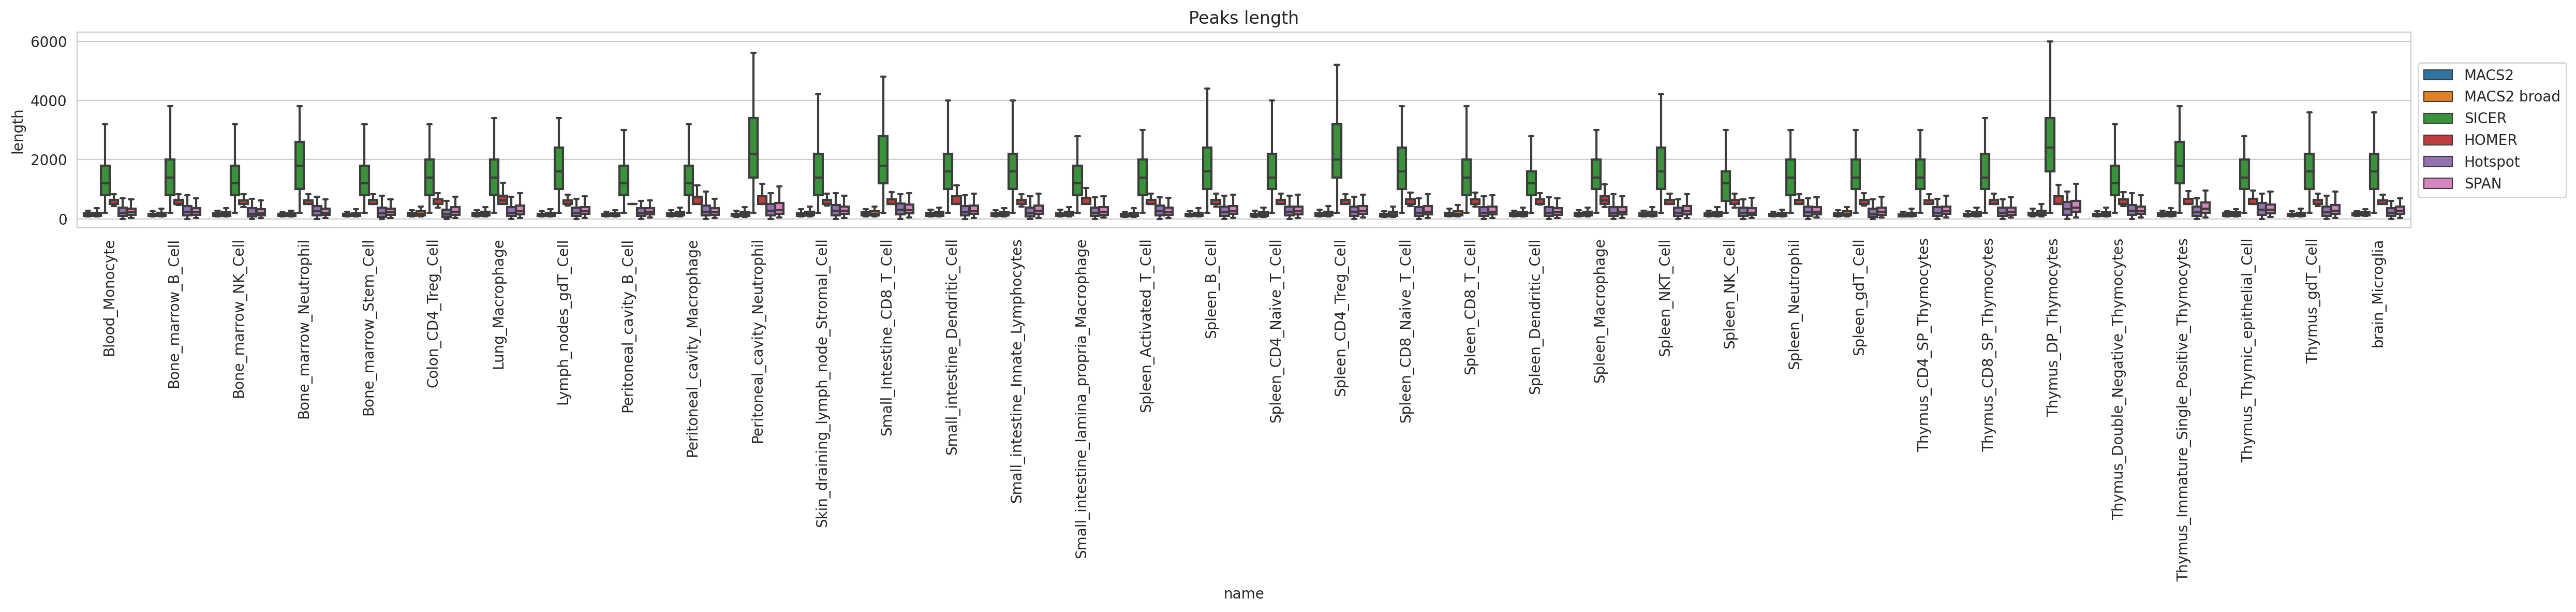

In [12]:
plt.figure(figsize=(25, 6))
g_result = sns.boxplot(data=df_lens, x='name', y='length', hue='tool',
                       hue_order=TOOLS,
                       palette=TOOLS_PALETTE,
                       showfliers=False)
plt.xticks(rotation=90)
plt.title('Peaks length')
g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks_length.pdf', bbox_inches='tight', dpi=300)
plt.show()

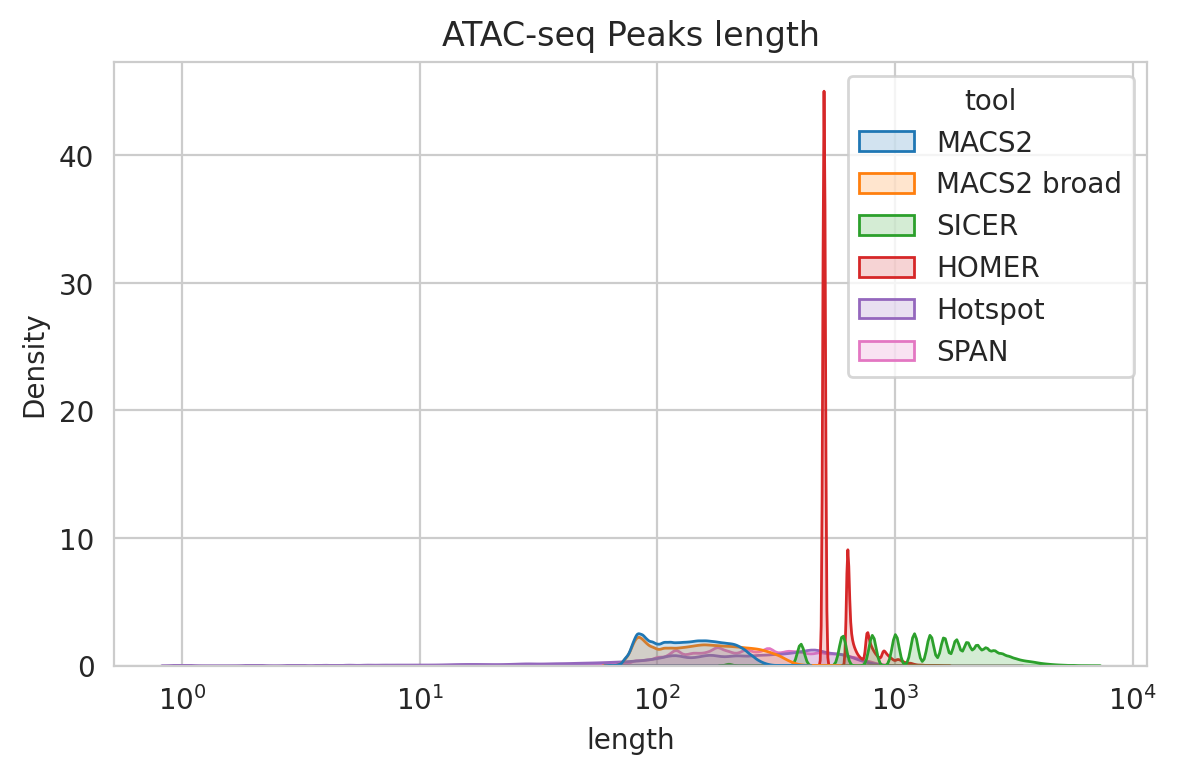

In [13]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
g_results = sns.kdeplot(data=df_lens, x='length', hue='tool', ax=ax,
                        hue_order=TOOLS,
                        palette=TOOLS_PALETTE,
                        fill=True, common_norm=False,
                        warn_singular=False,
                        log_scale=True, alpha=0.2)
g_results.set(xscale='log')
# g_results.set_ylim(0, 5)
# g_results.set_xlim(-1, 8e3)
ax.title.set_text('ATAC-seq Peaks length')
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks_length2.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Overlaps

In [ ]:
! mkdir {PATH}/overlaps
from itertools import product
import pyranges as pr


def compute_overlaps(df):
    dfoverlap = pd.DataFrame(columns=['name', 'tool', 'file1', 'file2',
                                      'peaks1', 'peaks2', 'overlap12', 'overlap21',
                                      'peaks1_len', 'peaks2_len', 'overlap_len'], dtype=object)
    for (name, tool), dft in tqdm(list(df.groupby(['name', 'tool']))):
        print('Processing', name, tool, len(dft))
        if len(dft) < 2:
            continue
        files = list(dft['file'])
        ranges = [None] * len(files)
        peaks = [-1] * len(files)
        peaks_lens = [-1] * len(files)
        # print('Load')
        for i, file in enumerate(files):
            peaks[i] = lines(file)
            if peaks[i] == 0:
                peaks_lens[i] = 0
                continue
            ranges[i] = pr.read_bed(sorted_file(file))
            peaks_lens[i] = ranges[i].lengths().sum()
        for i, j in product(range(len(ranges)), range(len(ranges))):
            if i >= j:
                continue
            file1, file2 = files[i], files[j]
            ranges1, ranges2 = ranges[i], ranges[j]
            peaks1, peaks2 = peaks[i], peaks[j]
            peaks1_len, peaks2_len = peaks_lens[i], peaks_lens[j]
            if peaks1 <= 0 or peaks2 <= 0:
                dfoverlap.loc[len(dfoverlap)] = (name, tool, file1, file2,
                                                 peaks1, peaks2, 0, 0,
                                                 peaks1_len, peaks2_len, 0)
                continue
            overlap1 = len(ranges1.overlap(ranges2))
            overlap2 = len(ranges2.overlap(ranges1))
            overlap_len = ranges1.intersect(ranges2).lengths().sum()
            dfoverlap.loc[len(dfoverlap)] = (name, tool, file1, file2,
                                             peaks1, peaks2, overlap1, overlap2,
                                             peaks1_len, peaks2_len, overlap_len)
    return dfoverlap

In [ ]:
df_overlap = compute_overlaps(dfa)

In [ ]:
df_overlap['jaccard'] = [
    d(lo, l1 + l2 - lo)
    for l1, l2, lo in zip(df_overlap['peaks1_len'], df_overlap['peaks2_len'], df_overlap['overlap_len'])
]
df_overlap.sort_values(by='name', inplace=True)

In [ ]:
print('Jaccard')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=df_overlap,
            x='tool', y='jaccard',
            order=TOOLS,
            # legend=False,
            dodge=False,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.05,
            # err_kws={'linewidth': 2}
            ax=ax)
sns.stripplot(data=df_overlap,
              x='tool', y='jaccard',
              order=TOOLS,
              dodge=False, size=2, color="black", alpha=0.05, palette='dark:black',
              legend=False,
              ax=ax)

plt.xticks(rotation=90)
plt.title('Jaccard replicates')
plt.tight_layout()
plt.savefig(f'{PATH}/pics/jaccard.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
print('Jaccard')

plt.figure(figsize=(25, 6))
ax = plt.axes()
sns.barplot(data=df_overlap,
            x='name', y='jaccard',
            hue='tool',
            hue_order=TOOLS,
            dodge=True,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.05,
            # err_kws={'linewidth': 2},
            ax=ax)
plt.xticks(rotation=90)
plt.title('Jaccard for cell type')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/jaccard.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Difference

In [16]:
diff_bench_df = pd.DataFrame(
    columns=['cell', 'srr', 'name', 'peaks'],
    dtype=object
)

tf = tempfile.mktemp()

for srr in tqdm(dfa['srr'].unique()):
    print(srr)
    t = dfa[(dfa['tool'] == 'SPAN') & (dfa['srr'] == srr)]
    if len(t) == 0:
        continue
    span_file = sorted_file(t['file'].values[0])
    cell_name = t['name'].values[0]
    # Processing single tools information
    for tool in dfa['tool'].unique():
        if tool == 'SPAN':
            continue
        t = dfa[(dfa['tool'] == tool) & (dfa['srr'] == srr)]
        if len(t) == 0:
            continue
        peaks_file = sorted_file(t['file'].values[0])
        for name, args in [
            (f'SPAN - {tool}', f' -a {span_file} -b {peaks_file} '),
            (f'{tool} - SPAN', f' -b {span_file} -a {peaks_file} ')]:
            !echo '' > {tf}
            !bedtools intersect {args} -wa -v > {tf}
            peaks = lines(tf)
            diff_bench_df.loc[len(diff_bench_df)] = (cell_name, srr, name, peaks)
        !rm {peaks_file} {tf}
diff_bench_df

  0%|          | 0/185 [00:00<?, ?it/s]

SRR5799542
SRR5799493
SRR5799541
SRR5799491
SRR5799492
SRR5799494
SRR5799471
SRR5799447
SRR5799451
SRR5799448
SRR5799449
SRR5799470
SRR5799454
SRR5799455
SRR5799453
SRR5799533
SRR5799452
SRR5799450
SRR5799417
SRR5799419
SRR5799418
SRR5799420
SRR5799416
SRR5799421
SRR5799405
SRR5799406
SRR5799539
SRR5799537
SRR5799528
SRR5799538
SRR5799530
SRR5799403
SRR5799404
SRR5799520
SRR5799521
SRR5799518
SRR5799519
SRR5799431
SRR5799430
SRR5799428
SRR5799429
SRR5799432
SRR5799433
SRR5799517
SRR5799461
SRR5799497
SRR5799498
SRR5799532
SRR5799536
SRR5799529
SRR5799495
SRR5799531
SRR5799496
SRR5799544
SRR5799543
SRR5799409
SRR5799548
SRR5799549
SRR5799550
SRR5799510
SRR5799507
SRR5799511
SRR5799506
SRR5799552
SRR5799509
SRR5799508
SRR5799445
SRR5799444
SRR5799527
SRR5799525
SRR5799524
SRR5799526
SRR5799486
SRR5799483
SRR5799489
SRR5799485
SRR5799488
SRR5799490
SRR5799484
SRR5799487
SRR5799522
SRR5799523
SRR5799402
SRR5799401
SRR5799513
SRR5799560
SRR5799556
SRR5799459
SRR5799516
SRR5799472
SRR5799468

cell         srr                name   peaks
0      Blood_Monocyte  SRR5799542  SPAN - MACS2 broad   15505
1      Blood_Monocyte  SRR5799542  MACS2 broad - SPAN     119
2      Blood_Monocyte  SRR5799542        SPAN - HOMER    1588
3      Blood_Monocyte  SRR5799542        HOMER - SPAN   20924
4      Blood_Monocyte  SRR5799542        SPAN - SICER    7839
...               ...         ...                 ...     ...
1845  brain_Microglia  SRR5799505        SICER - SPAN     776
1846  brain_Microglia  SRR5799505        SPAN - MACS2   11261
1847  brain_Microglia  SRR5799505        MACS2 - SPAN     143
1848  brain_Microglia  SRR5799505      SPAN - Hotspot       0
1849  brain_Microglia  SRR5799505      Hotspot - SPAN  461981

[1850 rows x 4 columns]

In [27]:
DIFF_PALETTE = {}
for tool in TOOLS:
    if tool != 'SPAN':
        DIFF_PALETTE[f'SPAN - {tool}'] = TOOLS_PALETTE[tool]
        DIFF_PALETTE[f'{tool} - SPAN'] = TOOLS_PALETTE[tool]

Diff


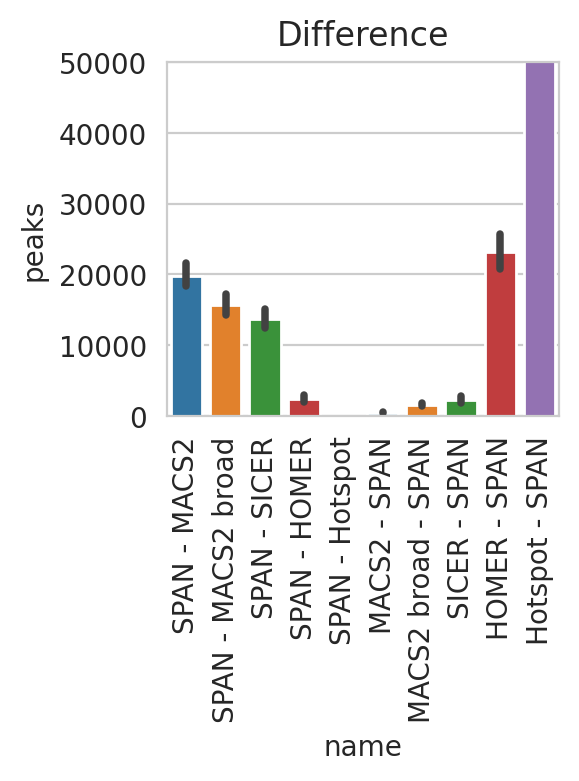

In [28]:
print('Diff')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=diff_bench_df,
            x='name', y='peaks',
            order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'SPAN - HOMER', 'SPAN - Hotspot',
                   'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN', 'HOMER - SPAN', 'Hotspot - SPAN'],
            palette=DIFF_PALETTE,
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylim(0, 50_000)
ax.set_title('Difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

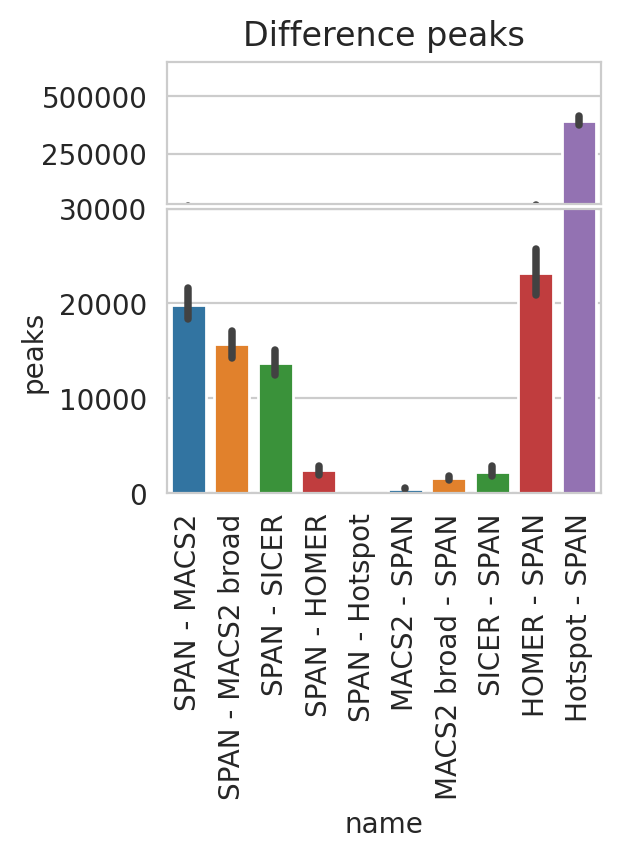

In [30]:
# Set up the matplotlib figure with broken y-axis
f, (axt, ax) = plt.subplots(2, 1, sharex=True, figsize=(2.8, 2.8),
                            gridspec_kw={'height_ratios': [1, 2]})
for j, axes in enumerate([ax, axt]):
    sns.barplot(data=diff_bench_df,
            x='name', y='peaks',
            order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'SPAN - HOMER', 'SPAN - Hotspot',
                   'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN', 'HOMER - SPAN', 'Hotspot - SPAN'],
            palette=DIFF_PALETTE,
            ax=axes)
ax.set_ylim(0, 30_000)
axt.set_ylim(30_000, 650_000)
axt.set_xlabel(None)
axt.set_ylabel(None)
ax.xaxis.set_tick_params(rotation=90)
axt.title.set_text('Difference peaks')
ax.set_ylabel('peaks')
# plt.tight_layout()
plt.subplots_adjust(hspace=0.02)  # Adjust hspace closer to zero to remove spacing
plt.show()

Diff


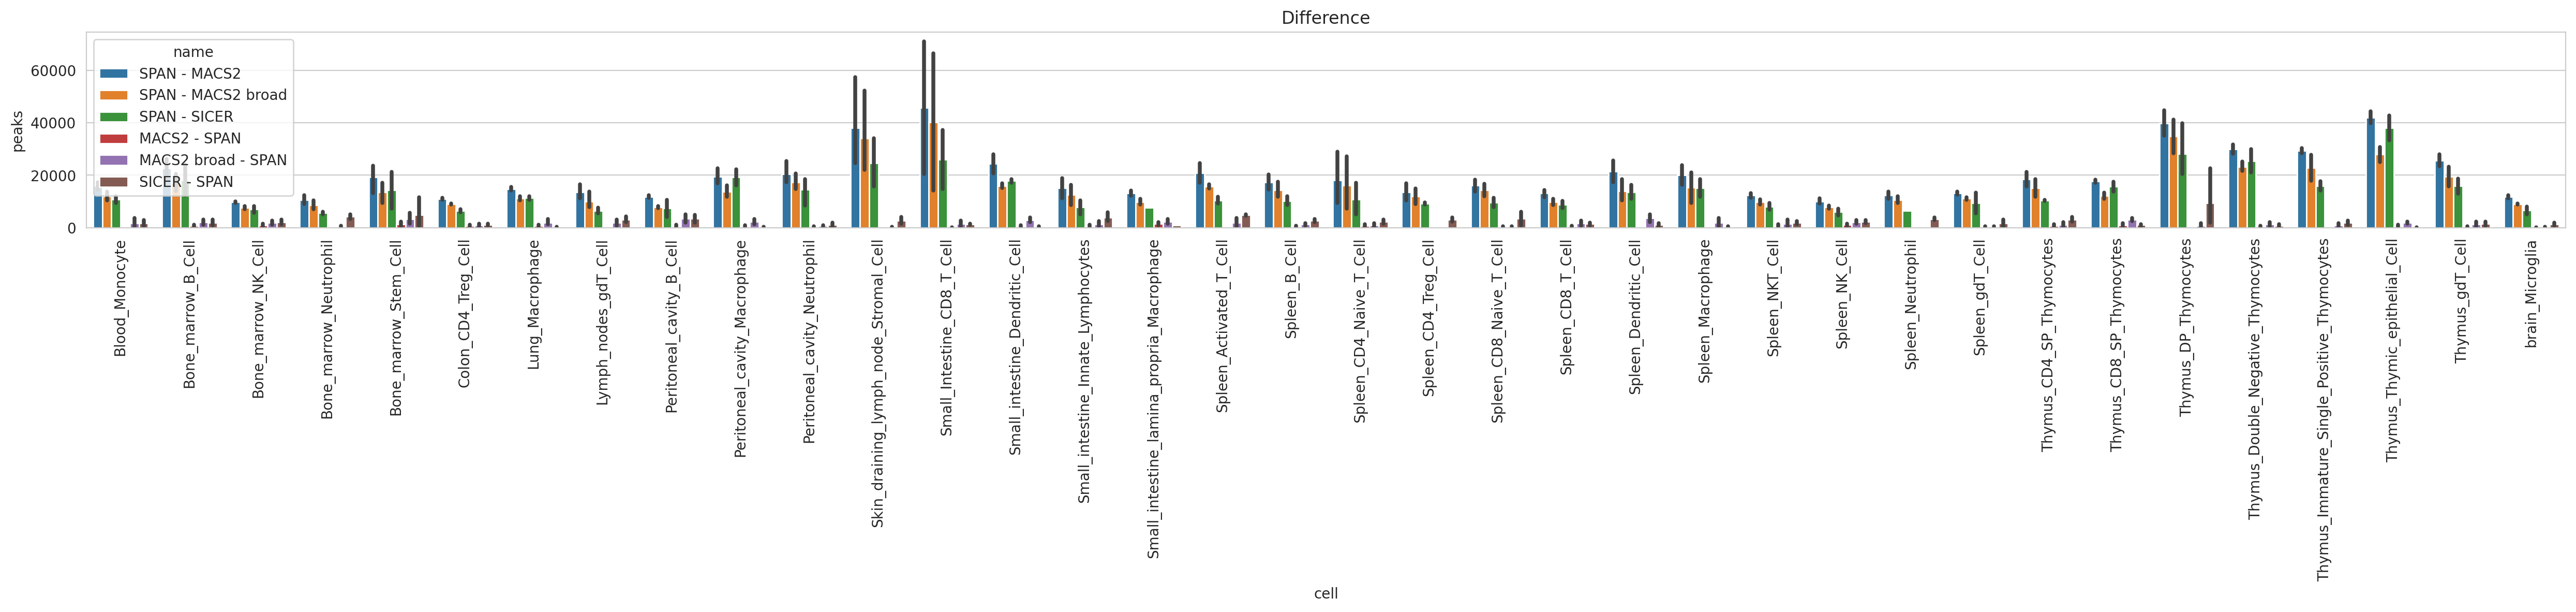

In [22]:
print('Diff')

plt.figure(figsize=(25, 6))
sns.barplot(data=diff_bench_df,
            x='cell', y='peaks', hue='name',
            hue_order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'MACS2 - SPAN', 'MACS2 broad - SPAN',
                       'SICER - SPAN'],
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            )
plt.xticks(rotation=90)
plt.title('Difference')
# sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Overlap with DHS

In [38]:
from itertools import product

DHS_PATH = f'{PATH}/ENCFF754WCT_mm10_dhs_representative_sites.bed'
dhs_path_sorted = sorted_file(DHS_PATH)
DHS_PEAKS = lines(DHS_PATH)


def compute_dhs_overlaps(df):
    dfoverlap = pd.DataFrame(columns=['srr', 'name', 'tool', 'file', 'way', 'peaks', 'overlap'], dtype=object)
    for (srr, name, tool), dft in tqdm(list(df.groupby(['srr', 'name', 'tool']))):
        print('Processing', srr, name, tool, len(dft))
        for _, row in dft.iterrows():
            file, peaks = sorted_file(row['file']), row['peaks']

            tf = f'{PATH}/overlaps/overlaps_{tool}_{name}_{tool}_vs_dhs.bed'.replace(' ', '_')
            !bedtools intersect -a {file} -b {dhs_path_sorted} -wa -u > {tf}
            owd = lines(tf)
            dfoverlap.loc[len(dfoverlap)] = (srr, name, tool, file, 'with_dhs', peaks, owd)

            tf = f'{PATH}/overlaps/overlaps_{tool}_{name}_{tool}_dhs_vs.bed'.replace(' ', '_')
            !bedtools intersect -b {file} -a {dhs_path_sorted} -wa -u > {tf}
            odw = lines(tf)
            dfoverlap.loc[len(dfoverlap)] = (srr, name, tool, file, 'dhs_with', DHS_PEAKS, odw)
    return dfoverlap

In [39]:
dhs_overlap = compute_dhs_overlaps(dfa)
dhs_overlap.sample(3)

  0%|          | 0/1110 [00:00<?, ?it/s]

Processing SRR5799381 Thymus_Thymic_epithelial_Cell HOMER 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell Hotspot 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell MACS2 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell MACS2 broad 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell SICER 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell SPAN 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell HOMER 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell Hotspot 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell MACS2 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell MACS2 broad 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell SICER 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell SPAN 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes HOMER 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes Hotspot 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes MACS2 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes MACS2 broad 1
Pr

srr                  name     tool              file       way  \
1983  SRR5799546  Thymus_DP_Thymocytes  Hotspot  /tmp/tmp82xzfxtt  dhs_with   
509   SRR5799423       Thymus_gdT_Cell    MACS2  /tmp/tmph8jcwihq  dhs_with   
526   SRR5799424       Thymus_gdT_Cell     SPAN  /tmp/tmp7wokx611  with_dhs   

        peaks  overlap  
1983  1192301   466769  
509   1192301    39670  
526     43115    38883

In [40]:
dhs_overlap['overlap_share'] = [o / p if p > 0 else 0 for o, p in zip(dhs_overlap['overlap'], dhs_overlap['peaks'])]
dhs_overlap.sample(3)

srr                   name   tool              file       way  \
1690  SRR5799521        Lung_Macrophage   SPAN  /tmp/tmp9evm1_ai  with_dhs   
1895  SRR5799538  Bone_marrow_Stem_Cell   SPAN  /tmp/tmpbqs9e_ft  dhs_with   
517   SRR5799424        Thymus_gdT_Cell  HOMER  /tmp/tmp9t14daau  dhs_with   

        peaks  overlap  overlap_share  
1690    47675    45144       0.946911  
1895  1192301    34679       0.029086  
517   1192301   132591       0.111206

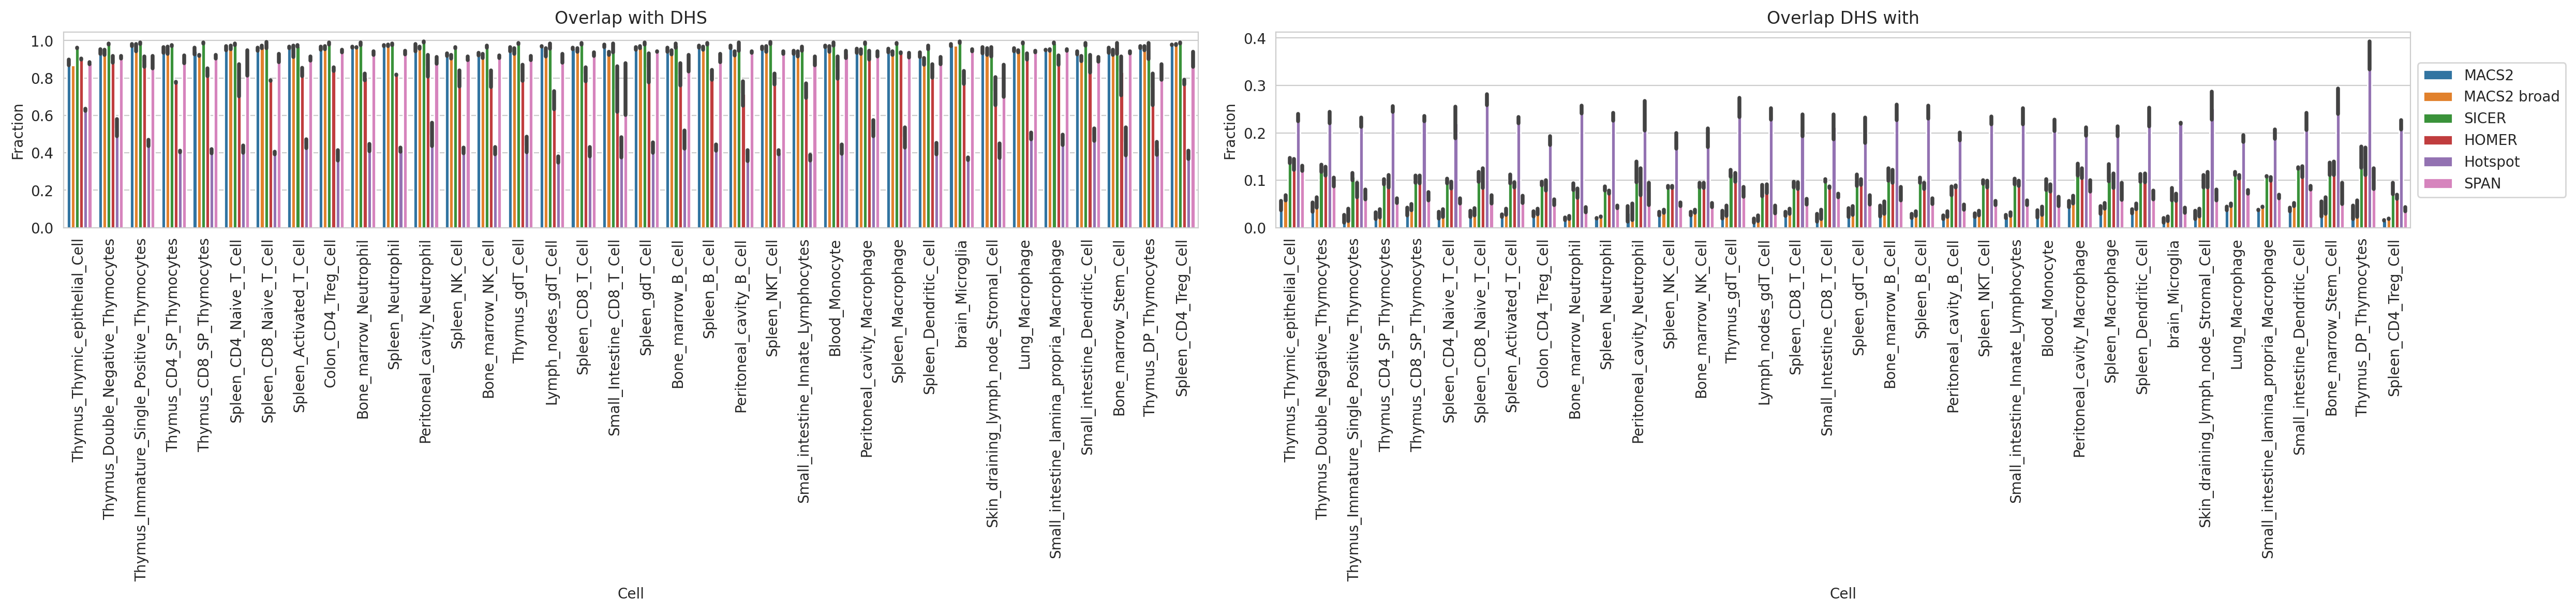

In [41]:
plt.figure(figsize=(25, 6))
# Plot 
ax = plt.subplot(1, 2, 1)
ax.title.set_text('Overlap with DHS')
sns.barplot(data=dhs_overlap[dhs_overlap['way'] == 'with_dhs'], x='name', y='overlap_share', hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel('Cell')
ax.set_ylabel('Fraction')
ax.legend(loc='lower left', title='tool')
ax.legend().set_visible(False)

ax = plt.subplot(1, 2, 2)
ax.title.set_text('Overlap DHS with')
t = dhs_overlap[dhs_overlap['way'] == 'dhs_with'].copy()
t['overlap'].clip(upper=0.15, inplace=True)
sns.barplot(data=t, x='name', y='overlap_share', hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel('Cell')
ax.set_ylabel('Fraction')
ax.legend(loc='lower left', title='tool')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{PATH}/pics/dhs.pdf', bbox_inches='tight', dpi=300)
plt.show()

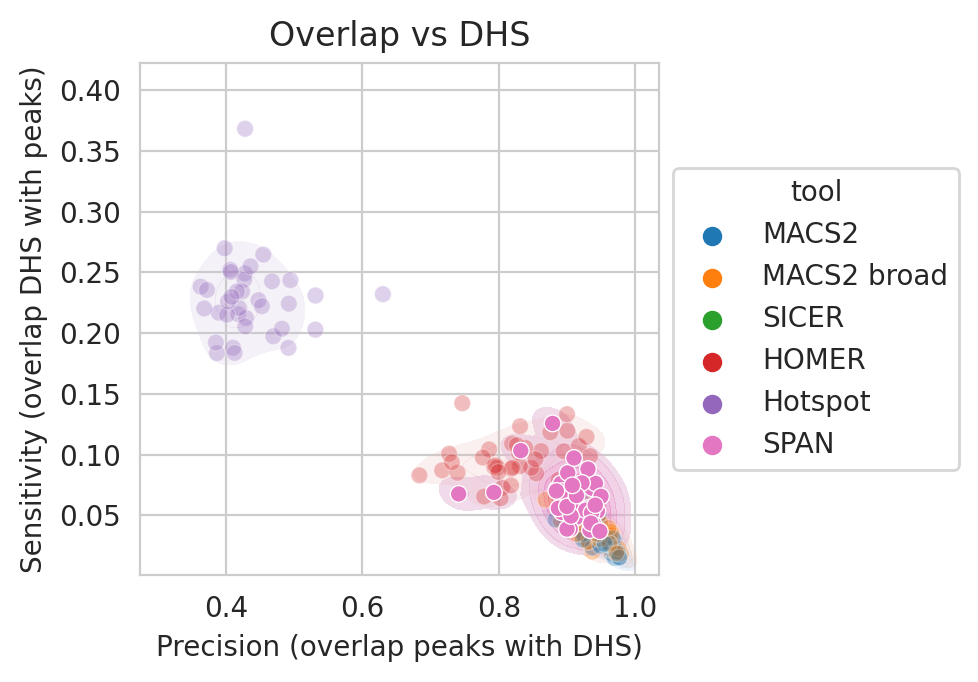

In [86]:
t = pd.pivot_table(dhs_overlap[['name', 'tool', 'way', 'overlap_share']],
                   values='overlap_share', columns=['way'], index=['name', 'tool']).reset_index()

t = t[t['tool'] != 'SICER']
plt.figure(figsize=(5, 3.5))
ax = plt.axes()
sns.kdeplot(t[t['tool'] != 'SPAN'],
            hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            x='with_dhs', y='dhs_with',
            alpha=0.2,
            thresh=0.05,
            fill=True,
            legend=False,
            ax=ax)
sns.kdeplot(t[t['tool'] == 'SPAN'],
            hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            x='with_dhs', y='dhs_with',
            alpha=0.5,
            thresh=0.05,
            fill=True,
            legend=False,
            ax=ax)

sns.scatterplot(
    t[t['tool'] != 'SPAN'], x='with_dhs', y='dhs_with',
    hue='tool',
    hue_order=TOOLS,
    alpha=0.3,
    palette=TOOLS_PALETTE,
    legend=False,
    ax=ax)
sns.scatterplot(
    t[t['tool'] == 'SPAN'], x='with_dhs', y='dhs_with',
    hue='tool',
    hue_order=TOOLS,
    palette=TOOLS_PALETTE,
    ax=ax)

ax.set_xlabel('Precision (overlap peaks with DHS)')
ax.set_ylabel('Sensitivity (overlap DHS with peaks)')
ax.title.set_text('Overlap vs DHS')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Top peaks vs DHS

In [46]:
def compute_dhs_overlaps_n(df):
    dhs_file = pr.read_bed(dhs_path_sorted)
    dhs_len = dhs_file.lengths().sum()
    rows = []
    for _, (srr, n, tool, file) in tqdm(list(df[['srr', 'name', 'tool', 'file']].iterrows())):
        print('Processing', n, tool, file)
        peaks_file = pr.read_bed(sorted_file(file), as_df=True)
        if len(peaks_file) == 0:
            for top in np.linspace(1000, 50000, 25):
                rows.append((srr, n, tool, int(top), DHS_PEAKS, file, 0, 0, 0, dhs_len, 0, 0))
            continue
        peaks_file.sort_values(
            by=peaks_file.columns[8] if len(peaks_file.columns) >= 9 else peaks_file.columns[3],
            ascending=False, inplace=True
        )
        for top in np.linspace(1000, 50000, 25):
            t = PyRanges(peaks_file.head(int(top)).sort_values(by=['Chromosome', 'Start']))
            peaks = len(t)
            peaks_len = t.lengths().sum()
            ovlp = t.overlap(dhs_file)
            peaks_overlap = len(ovlp)
            overlap_len = ovlp.lengths().sum()
            dhs_overlap = len(dhs_file.overlap(t))
            rows.append((srr, n, tool, int(top), DHS_PEAKS, file, peaks, peaks_overlap, dhs_overlap, dhs_len, peaks_len,
                         overlap_len))

    df = pd.DataFrame(
        rows,
        columns=['srr', 'name', 'tool', 'top', 'dhs_peaks', 'peaks_file', 'peaks', 'peaks_overlap', 'dhs_overlap',
                 'dhs_len', 'peaks_len', 'overlap_len'],
        dtype=object
    )
    df['jaccard'] = [
        d(o, lp + ld - o)
        for lp, ld, o in zip(df['peaks_len'], df['dhs_len'], df['overlap_len'])
    ]

    return df

In [47]:
dhs_ovlp_df = compute_dhs_overlaps_n(dfa)
dhs_ovlp_df.sample(3)

  0%|          | 0/1110 [00:00<?, ?it/s]

Processing Blood_Monocyte MACS2 broad /home/jetbrains/data/2024_Immgen/macs2/SRR5799542_Blood_Monocyte_ATAC_seq_broad0.1_peaks.broadPeak
Processing Blood_Monocyte SPAN /home/jetbrains/data/2024_Immgen/span/SRR5799542_Blood_Monocyte_ATAC_seq_100_0.05.peak
Processing Blood_Monocyte MACS2 broad /home/jetbrains/data/2024_Immgen/macs2/SRR5799493_Blood_Monocyte_ATAC_seq_broad0.1_peaks.broadPeak
Processing Blood_Monocyte HOMER /home/jetbrains/data/2024_Immgen/homer/SRR5799541_Blood_Monocyte_ATAC_seq.peaks
Processing Blood_Monocyte HOMER /home/jetbrains/data/2024_Immgen/homer/SRR5799491_Blood_Monocyte_ATAC_seq.peaks
Processing Blood_Monocyte MACS2 broad /home/jetbrains/data/2024_Immgen/macs2/SRR5799492_Blood_Monocyte_ATAC_seq_broad0.1_peaks.broadPeak
Processing Blood_Monocyte SICER /home/jetbrains/data/2024_Immgen/sicer/SRR5799494_Blood_Monocyte_ATAC_seq-W200-G600-E100.scoreisland
Processing Blood_Monocyte MACS2 /home/jetbrains/data/2024_Immgen/macs2/SRR5799492_Blood_Monocyte_ATAC_seq_q0.05_pe

srr                     name   tool    top dhs_peaks  \
21248  SRR5799482          Spleen_NKT_Cell  MACS2  47958   1192301   
16466  SRR5799534  Spleen_CD4_Naive_T_Cell  MACS2  33666   1192301   
15456  SRR5799458            Spleen_B_Cell   SPAN  13250   1192301   

                                              peaks_file  peaks peaks_overlap  \
21248  /home/jetbrains/data/2024_Immgen/macs2/SRR5799...  26120         25387   
16466  /home/jetbrains/data/2024_Immgen/macs2/SRR5799...  33666         32436   
15456  /home/jetbrains/data/2024_Immgen/span/SRR57994...  13250         13189   

      dhs_overlap    dhs_len peaks_len overlap_len   jaccard  
21248       26338  311395372   5105100     5006897  0.016074  
16466       33231  311395372   6276726     6129740  0.019675  
15456       31925  311395372  10551404    10470175  0.033615

In [48]:
dhs_ovlp_df['p'] = (dhs_ovlp_df['peaks_overlap'] + dhs_ovlp_df['dhs_overlap']) / 2
dhs_ovlp_df['precision'] = [d(x, y) for x, y in zip(dhs_ovlp_df['peaks_overlap'], dhs_ovlp_df['peaks'])]
dhs_ovlp_df['sensitivity'] = [d(x, y) for x, y in zip(dhs_ovlp_df['dhs_overlap'], dhs_ovlp_df['dhs_peaks'])]
dhs_ovlp_df['f1'] = [
    2 / (d(1, s + 1e-10) + d(1, p + 1e-10))
    for s, p in zip(dhs_ovlp_df['sensitivity'], dhs_ovlp_df['precision'])]

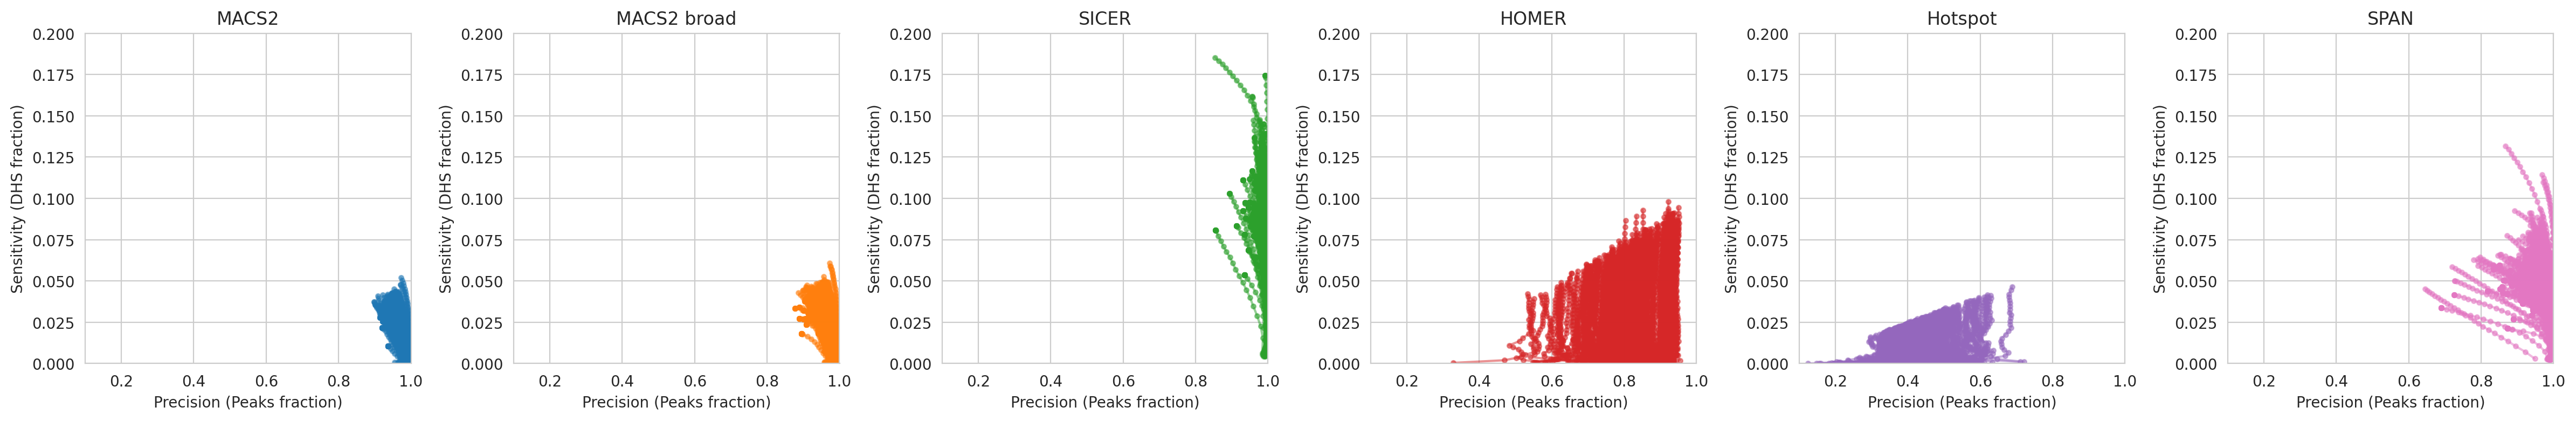

In [66]:
plt.figure(figsize=(24, 4))
axs = [plt.subplot(1, 6, i + 1) for i in range(6)]
for i, tool in enumerate(TOOLS):
    ax = axs[i]
    for (srr, n), dft in dhs_ovlp_df[dhs_ovlp_df['tool'] == tool].groupby(['srr', 'name']):
        ax.plot(dft['precision'], dft['sensitivity'], marker='.',
                color=TOOLS_PALETTE[tool], alpha=0.5)
    ax.set_title(f'{tool}')
    ax.set_xlabel('Precision (Peaks fraction)')
    ax.set_ylabel('Sensitivity (DHS fraction)')
    ax.set_xlim(0.1, 1.0)
    ax.set_ylim(0.0, 0.2)
plt.tight_layout()
plt.show()

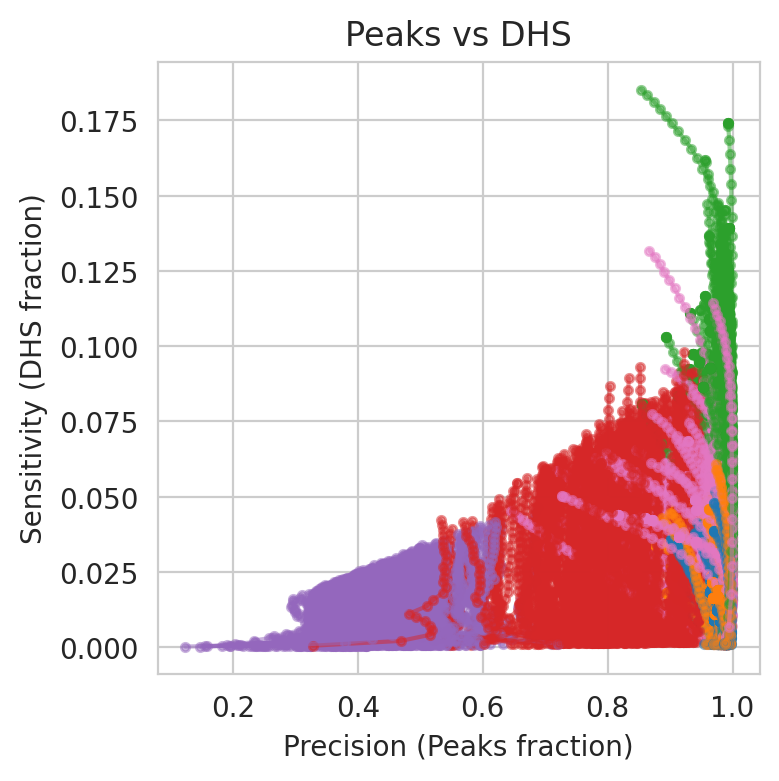

In [88]:
plt.figure(figsize=(4, 4))
for (srr, n, tool), dft in dhs_ovlp_df.groupby(['srr', 'name', 'tool']):
    # print(srr, n, tool)
    plt.plot(dft['precision'], dft['sensitivity'], marker='.',
             color=TOOLS_PALETTE[tool], alpha=0.5)
plt.title('Peaks vs DHS')
plt.xlabel('Precision (Peaks fraction)')
plt.ylabel('Sensitivity (DHS fraction)')
plt.tight_layout()
plt.show()

In [96]:
dhs_ovlp_df[(dhs_ovlp_df['sensitivity'] > 0.1) & (dhs_ovlp_df['tool'] == 'SPAN')]

srr                                   name  tool    top  \
2467  SRR5799471                     Bone_marrow_B_Cell  SPAN  35708   
2468  SRR5799471                     Bone_marrow_B_Cell  SPAN  37750   
2469  SRR5799471                     Bone_marrow_B_Cell  SPAN  39791   
2470  SRR5799471                     Bone_marrow_B_Cell  SPAN  41833   
2471  SRR5799471                     Bone_marrow_B_Cell  SPAN  43875   
2472  SRR5799471                     Bone_marrow_B_Cell  SPAN  45916   
2473  SRR5799471                     Bone_marrow_B_Cell  SPAN  47958   
2474  SRR5799471                     Bone_marrow_B_Cell  SPAN  50000   
9642  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  35708   
9643  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  37750   
9644  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  39791   
9645  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  41833   
9646  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  43875   
9647  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  45916   
9648  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  47958   
9649  SRR5799508  Skin_draining_lymph_node_Stromal_Cell  SPAN  50000   

     dhs_peaks                                         peaks_file  peaks  \
2467   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2468   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2469   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2470   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2471   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2472   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2473   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
2474   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57994...  35674   
9642   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  35708   
9643   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  37750   
9644   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  39791   
9645   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  41833   
9646   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  43875   
9647   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  45916   
9648   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  47958   
9649   1192301  /home/jetbrains/data/2024_Immgen/span/SRR57995...  50000   

     peaks_overlap dhs_overlap    dhs_len peaks_len overlap_len   jaccard  \
2467         24597       40185  311395372  17444454    13383135  0.042425   
2468         24597       40185  311395372  17444454    13383135  0.042425   
2469         24597       40185  311395372  17444454    13383135  0.042425   
2470         24597       40185  311395372  17444454    13383135  0.042425   
2471         24597       40185  311395372  17444454    13383135  0.042425   
2472         24597       40185  311395372  17444454    13383135  0.042425   
2473         24597       40185  311395372  17444454    13383135  0.042425   
2474         24597       40185  311395372  17444454    13383135  0.042425   
9642         24890       44792  311395372  29430560    20097465  0.062662   
9643         25977       46193  311395372  30500375    20612235  0.064156   
9644         27085       47607  311395372  31529655    21116255  0.065617   
9645         28116       48910  311395372  32530830    21573535  0.066925   
9646         29152       50192  311395372  33513170    22034810  0.068246   
9647         30164       51484  311395372  34494535    22480700  0.069512   
9648         31195       52790  311395372  35444540    22926715  0.070780   
9649         32243       54068  311395372  36325530    23345735  0.071971   

            p  precision  sensitivity        f1  
2467  32391.0   0.689494     0.033704  0.064266  
2468  32391.0   0.689494     0.033704  0.064266  
2469  32391.0   0.689494     0.0337

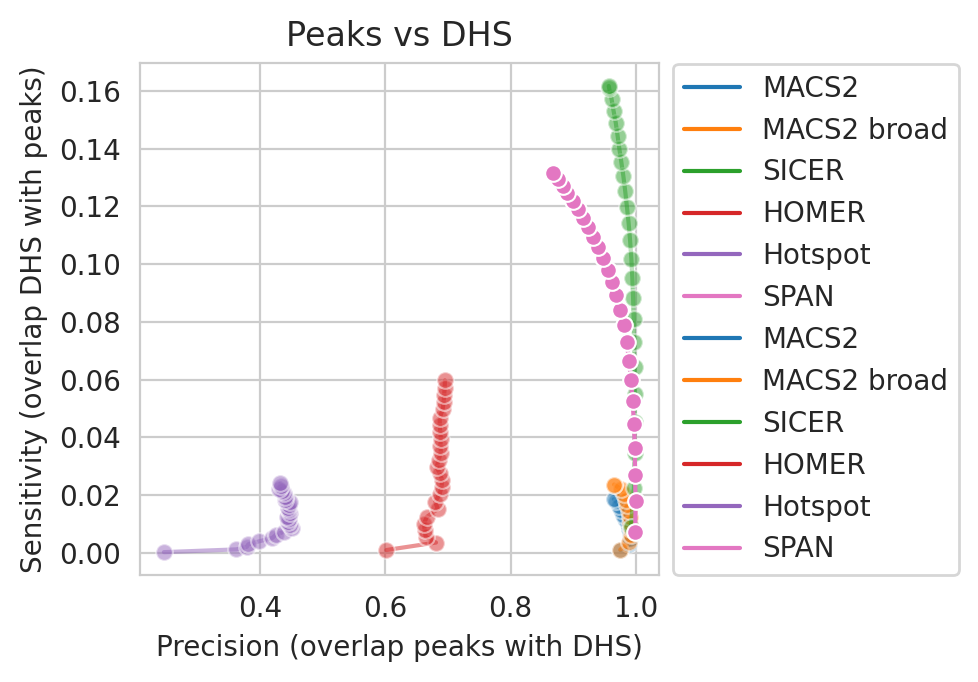

In [100]:
plt.figure(figsize=(5, 3.5))
ax = plt.axes()
t = dhs_ovlp_df[(dhs_ovlp_df['srr'] == 'SRR5799546')]
sns.lineplot(
    data=t[t['tool'] != 'SPAN'],
    x='precision', y='sensitivity',
    hue_order=TOOLS,
    hue='tool', marker='o',
    alpha=0.5,
    sort=False,
    palette=TOOLS_PALETTE,
    ax=ax
)
sns.lineplot(
    data=t[t['tool'] == 'SPAN'],
    x='precision', y='sensitivity',
    hue_order=TOOLS,
    hue='tool', marker='o',
    alpha=1,
    sort=False,
    palette=TOOLS_PALETTE,
    ax=ax
)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Peaks vs DHS')
plt.xlabel('Precision (overlap peaks with DHS)')
plt.ylabel('Sensitivity (overlap DHS with peaks)')

plt.tight_layout()
plt.show()

In [67]:
rows = []
for (srr, n, tool), dft in dhs_ovlp_df.groupby(['srr', 'name', 'tool']):
    dft.sort_values(by=['top'], inplace=True)
    ap = 0
    sprev, pprev = None, None
    for _, row in dft.iterrows():
        if sprev is not None and pprev is not None:
            ap += (row['sensitivity'] - sprev) * (row['precision'] + pprev) / 2
        sprev, pprev = row['sensitivity'], row['precision']
    rows.append((srr, n, tool, ap))
dhs_ovlp_df_df = pd.DataFrame(rows, columns=['srr', 'name', 'tool', 'auc'])
del rows
dhs_ovlp_df_df.sample(2)

srr                          name  tool       auc
707  SRR5799498  Peritoneal_cavity_Macrophage  SPAN  0.070650
359  SRR5799440             Spleen_CD8_T_Cell  SPAN  0.051315

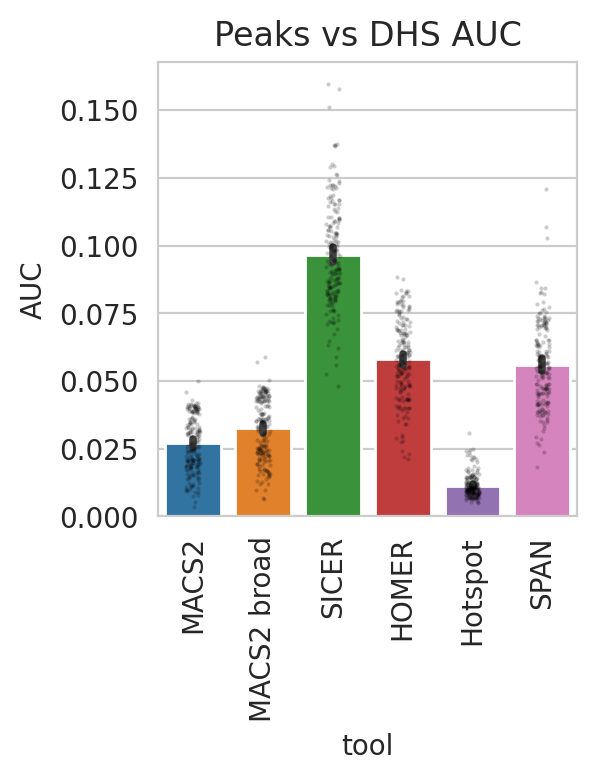

In [70]:
plt.figure(figsize=(3, 4))
ax = plt.axes()
ax.title.set_text('Peaks vs DHS AUC')
t = dhs_ovlp_df_df
sns.barplot(data=t, x='tool', y='auc',
            # capsize=.1, err_kws={'linewidth': 2},
            order=TOOLS,
            palette=TOOLS_PALETTE,
            ax=ax)
sns.stripplot(data=t, x='tool', y='auc',
              dodge=True, size=1.5, color="black", alpha=0.2,
              order=TOOLS,
              ax=ax)

ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('AUC')
plt.tight_layout()
plt.show()

# Bigwigs based coverage

In [31]:
def atac_load_bws(path):
    df = pd.DataFrame(columns=['file', 'srr', 'name'], dtype=object)
    for f in tqdm(os.listdir(path)):
        if not f.endswith('.bw'):
            continue
        file = os.path.join(path, f)
        df.loc[len(df)] = (file, file_to_srr(f), file_to_name(f))
    return df


df_bams = atac_load_bws(PATH + '/bw')
df_bams.sample(3)

  0%|          | 0/185 [00:00<?, ?it/s]

file         srr  \
13   /home/jetbrains/data/2024_Immgen/bw/SRR5799405...  SRR5799405   
76   /home/jetbrains/data/2024_Immgen/bw/SRR5799444...  SRR5799444   
123  /home/jetbrains/data/2024_Immgen/bw/SRR5799518...  SRR5799518   

                           name  
13       Bone_marrow_Neutrophil  
76   Small_Intestine_CD8_T_Cell  
123             Lung_Macrophage

In [ ]:
# ! conda install pyBigWig -c bioconda -y

In [32]:
import pyBigWig

CHROM_SIZES = {
    c: s for _, (c, s) in pd.read_csv(os.path.join(PATH, 'mm10.chrom.sizes'),
                                      sep='\t', names=['chr', 'size']).iterrows() if '_' not in c
}

total_coverages = {}
ts = []
for _, (file, srr, name) in tqdm(list(df_bams[['file', 'srr', 'name']].iterrows())):
    try:
        with pyBigWig.open(file) as bw:
            total_coverage = sum(
                bw.stats(chr, exact=True, type='sum')[0] for chr in CHROM_SIZES.keys() if '_' not in chr)
            print('Total coverage', total_coverage)
            # Multiplier to align BAM coverage with BigWig estimation
            total_coverage *= 1.1e-2
            total_coverages[(srr, name)] = total_coverage
    except Exception:
        pass

total_coverages

  0%|          | 0/185 [00:00<?, ?it/s]

Total coverage 68706944.28250217
Total coverage 63545909.384791374
Total coverage 76152597.54262495
Total coverage 75180143.34051704
Total coverage 67265985.9938128
Total coverage 70976950.71421719
Total coverage 67699902.12035751
Total coverage 50040405.83816624
Total coverage 79785138.91390991
Total coverage 56215488.798733234
Total coverage 75621080.8723154
Total coverage 69820939.83396196
Total coverage 64223934.234651804
Total coverage 76262475.75324893
Total coverage 69310119.13946962
Total coverage 70073806.75087357
Total coverage 56029175.884141445
Total coverage 62309602.363991976
Total coverage 31460709.967515707
Total coverage 71759779.20138836
Total coverage 61197839.32630229
Total coverage 74032008.30245543
Total coverage 65423567.254221916
Total coverage 60717014.28111029
Total coverage 71577321.26472378
Total coverage 63254705.361252785
Total coverage 55841983.48340988
Total coverage 50452470.5484221
Total coverage 67069842.574133635
Total coverage 61904199.17429662
Tota

{('SRR5799401', 'Spleen_Activated_T_Cell'): 755776.3871075239,
 ('SRR5799541', 'Blood_Monocyte'): 699005.003232705,
 ('SRR5799407', 'Spleen_Neutrophil'): 837678.5729688744,
 ('SRR5799536', 'Peritoneal_cavity_Macrophage'): 826981.5767456874,
 ('SRR5799449', 'Bone_marrow_B_Cell'): 739925.8459319407,
 ('SRR5799465', 'Spleen_B_Cell'): 780746.457856389,
 ('SRR5799448', 'Bone_marrow_B_Cell'): 744698.9233239326,
 ('SRR5799446', 'Spleen_gdT_Cell'): 550444.4642198286,
 ('SRR5799500', 'Spleen_Macrophage'): 877636.528053009,
 ('SRR5799430', 'Lymph_nodes_gdT_Cell'): 618370.3767860655,
 ('SRR5799515', 'Spleen_B_Cell'): 831831.8895954695,
 ('SRR5799526', 'Small_intestine_Dendritic_Cell'): 768030.3381735815,
 ('SRR5799478', 'Spleen_NKT_Cell'): 706463.2765811698,
 ('SRR5799405', 'Bone_marrow_Neutrophil'): 838887.2332857382,
 ('SRR5799492', 'Blood_Monocyte'): 762411.3105341658,
 ('SRR5799509', 'Skin_draining_lymph_node_Stromal_Cell'): 770811.8742596091,
 ('SRR5799520', 'Lung_Macrophage'): 616320.934725

In [33]:
total_coverages_df = pd.DataFrame([(srr, name, reads) for (srr, name), reads in total_coverages.items()],
                                  columns=['srr', 'name', 'reads'])
total_coverages_df.sample(5)

srr                            name          reads
136  SRR5799542                  Blood_Monocyte  798929.904530
21   SRR5799561                   Spleen_B_Cell  814352.091327
67   SRR5799524  Small_intestine_Dendritic_Cell  640383.111648
123  SRR5799518                 Lung_Macrophage  642198.761713
117  SRR5799517        Peritoneal_cavity_B_Cell  736097.103008

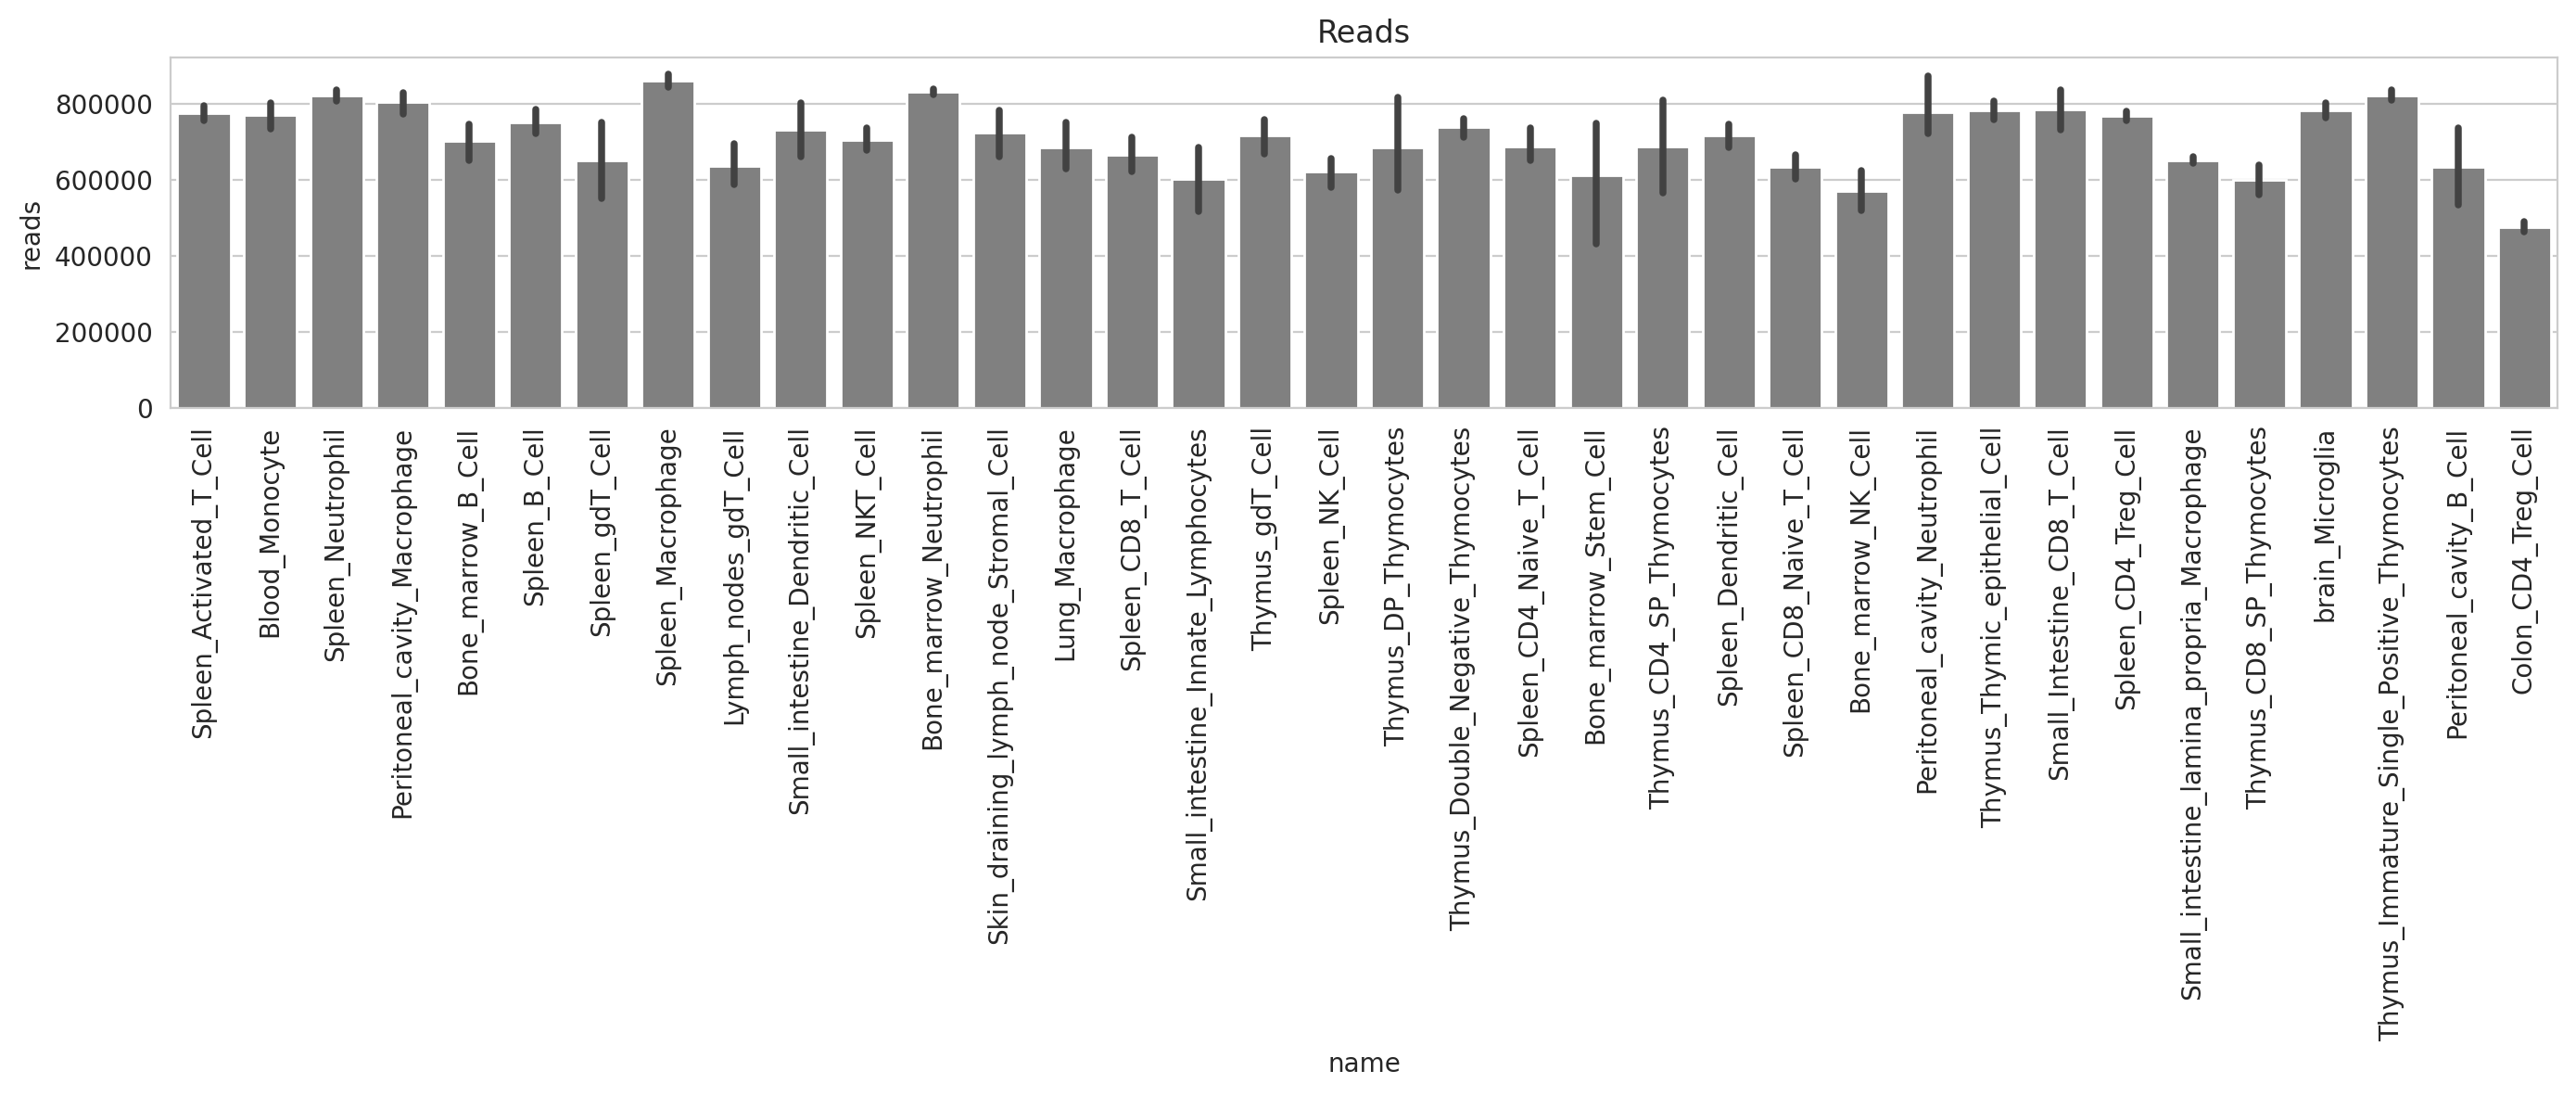

In [34]:
plt.figure(figsize=(14, 6))
g_result = sns.barplot(data=total_coverages_df, x='name', y='reads',
                       color='grey'
                       )
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Reads')
plt.tight_layout()
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Difference coverage

In [35]:
tf = tempfile.mktemp()

rows = []
for srr in tqdm(dfa['srr'].unique()):
    print(srr)
    t = dfa[(dfa['tool'] == 'SPAN') & (dfa['srr'] == srr)]
    if len(t) != 1:
        continue
    span_file = sorted_file(t['file'].values[0])
    cell_name = t['name'].values[0]
    totalm = total_coverages[(srr, cell_name)] * 1e-6
    # Processing single tools information
    bw_path = df_bams[(df_bams['srr'] == srr) & (df_bams['name'] == cell_name)]['file'].values[0]
    with pyBigWig.open(bw_path) as bw:
        for tool in dfa['tool'].unique():
            if tool == 'SPAN':
                continue
            t = dfa[(dfa['tool'] == tool) & (dfa['srr'] == srr)]
            if len(t) != 1:
                continue
            peaks_file = sorted_file(t['file'].values[0])
            for name, args in [
                (f'SPAN - {tool}', f' -a {span_file} -b {peaks_file} '),
                (f'{tool} - SPAN', f' -b {span_file} -a {peaks_file} ')]:
                ! echo '' > {tf}
                ! bedtools intersect {args} -wa -v > {tf}
                if lines(tf) == 0:
                    continue
                t2 = pd.read_csv(tf, sep='\t', header=None)
                if len(t2.columns) == 10:  # Peakseq
                    sort_col = t2.columns[9]
                elif len(t2.columns) >= 9:
                    sort_col = t2.columns[8]
                else:
                    sort_col = t2.columns[4]
                t2.sort_values(by=sort_col, ascending=False, inplace=True)
                t2 = t2[~t2[0].str.contains('M|_', regex=True)]
                for _, (chr, start, end) in t2.head(50)[[0, 1, 2]].iterrows():
                    cov = bw.stats(chr, start, end, exact=True, type='sum')[0]
                    rpk = cov / (end - start) * 1e3
                    rpm = cov / totalm
                    rpkm = rpk / totalm
                    rows.append((srr, cell_name, name, len(t2), chr, start, end, end - start, rpk, rpm, rpkm))
            ! rm {peaks_file} {tf}
diff_bench_coverage_df = pd.DataFrame(
    rows,
    columns=['srr', 'cell', 'name', 'peaks', 'chromosome', 'start', 'end', 'length', 'rpk', 'rpm', 'rpkm'],
    dtype=object
)
diff_bench_coverage_df.sample(3)

  0%|          | 0/185 [00:00<?, ?it/s]

SRR5799542


IndexError: index 4 is out of bounds for axis 0 with size 4

Diff


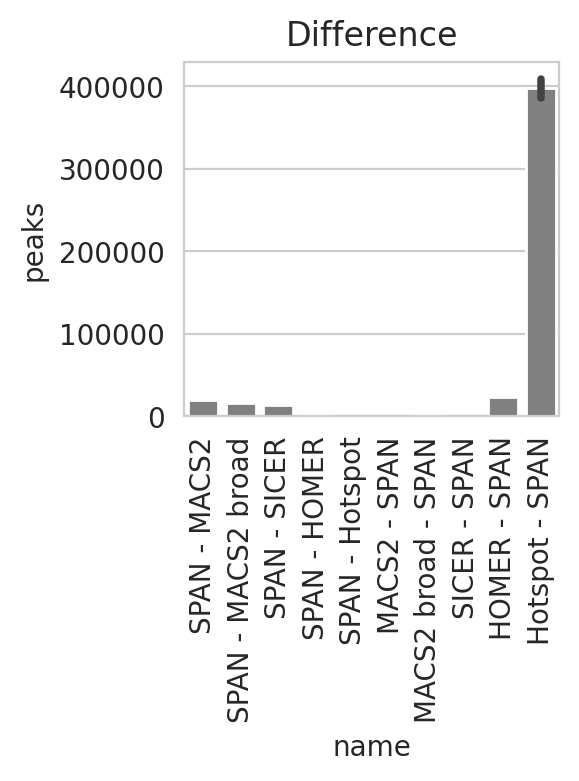

In [31]:
print('Diff')

plt.figure(figsize=(3, 4))
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='peaks',
            order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'SPAN - HOMER', 'SPAN - Hotspot',
                   'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN', 'HOMER - SPAN', 'Hotspot - SPAN'],
            palette=DIFF_PALETTE,
            )
plt.xticks(rotation=90)
plt.title('Difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

Diff


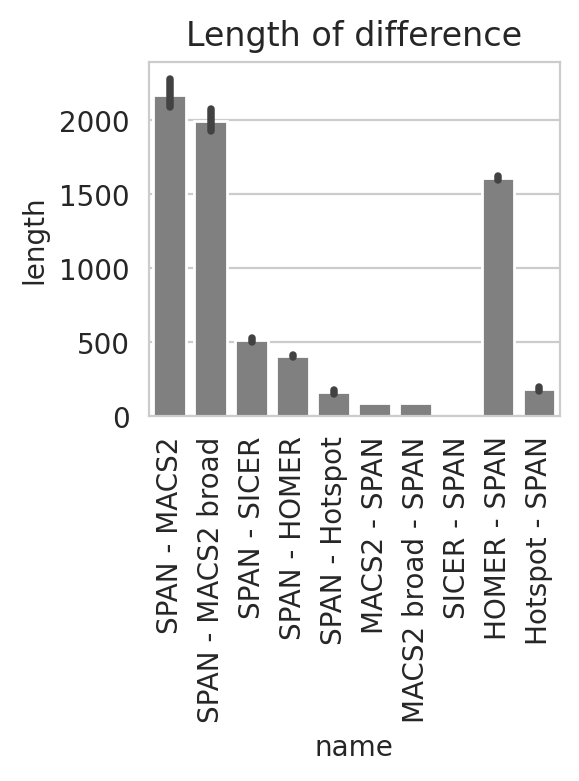

In [36]:
print('Diff')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='length',
            order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'SPAN - HOMER', 'SPAN - Hotspot',
                   'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN', 'HOMER - SPAN', 'Hotspot - SPAN'],
            palette=DIFF_PALETTE,
            ax=ax)
plt.xticks(rotation=90)
plt.title('Length of difference')
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

Diff


NameError: name 'diff_bench_coverage_df' is not defined

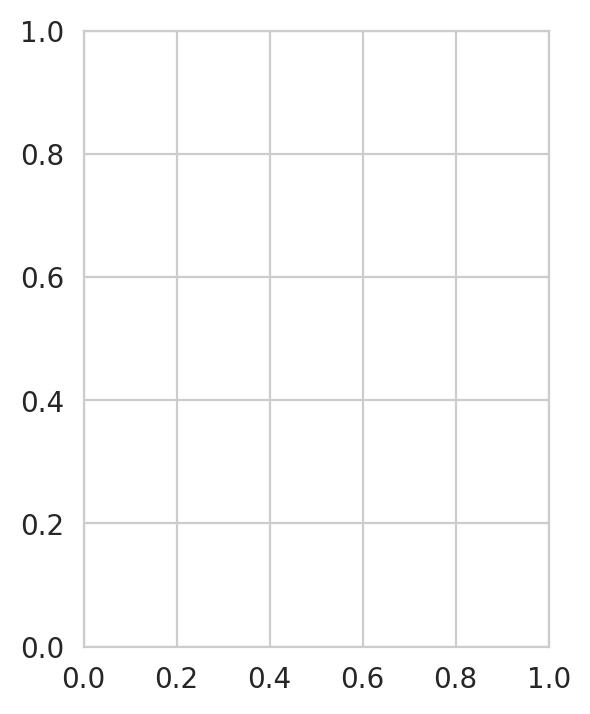

In [36]:
print('Diff')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='rpkm',
            order=['SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER', 'SPAN - HOMER', 'SPAN - Hotspot',
                   'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN', 'HOMER - SPAN', 'Hotspot - SPAN'],
            palette=DIFF_PALETTE,
            ax=ax)
plt.xticks(rotation=90)
plt.title('Coverage of difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

# END